<a href="https://colab.research.google.com/github/muhammadshehryar-codes/EDA-TITANIC-DATASET-/blob/main/eda_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploatry Data Analysis (EDA)**
**Exploratory Data Analysis (EDA)** is the process of analyzing and visualizing datasets to:

1. Understand their main characteristics

2. Discover patterns and trends

3. Identify anomalies or outliers

4. Test assumptions

5. Check data quality before modeling

It is often the first step in data analysis, done before applying machine learning or statistical models.

**Common EDA Tasks:**

1. **Descriptive Statistics:** Mean, median, standard deviation, etc.

2. **Data Cleaning:** Handling missing values, removing duplicates.

3. **Data Visualization:** Using plots like histograms, boxplots, scatter plots, heatmaps.

4. **Feature Relationships:** Finding correlations and dependencies.

5. **Class Distributions:** For classification problems, checking balance across classes.

## **Example (TITANIC-Dataset EDA Code)**
We are going to look at an **Exploatory Data Analysis (EDA)** example of the Titanic-dataset that gives you:

1. A look at the dataset

2. Basic statistics

3. Visual patterns across classes (survival, gender, etc.)

4. Correlation insights


### **Step 1: Import Libraries**
Here we first imports the pandas library, giving it the alias pd. **pandas** is used for loading, manipulating, and analyzing tabular data (DataFrames).

Secondly, we imports the seaborn library, aliased as sns.**seaborn** is a high-level plotting library built on Matplotlib, with convenient functions for statistical graphics.

Then we imports the pyplot module from matplotlib and calls it plt.**Matplotlib** is the foundational plotting library; plt gives you low-level control over figures.

The next command **sns.set(style="whitegrid")** applies a global Seaborn theme named “whitegrid”.This adds a clean white background with faint grid lines to all subsequent plots, improving readability.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set visual style
sns.set(style="whitegrid")

### **Step 2: Load the Dataset**
**sns.load_dataset("titanic")** is a convenience function in Seaborn that fetches a built-in example dataset named “titanic” and returns it as a pandas DataFrame.We assign that DataFrame to the variable titanic, so we can work with it using pandas and plotting tools.

**titanic.head()** returns the top five rows of the DataFrame and wrapping it in **print()** outputs those rows to the console, giving you a quick glance at the columns and sample values.

These lines of code taken together load the data into memory and show you the first few records so you can verify its structure before proceeding with analysis.


In [ ]:
# load the Titanic Dataset
titanic=sns.load_dataset("titanic")

#Display First 5 rows
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### **Step 3: Data Overview**
**titanic.shape** returns a tuple (rows, columns).You see how many records (passengers) and how many fields (features) you have.

**titanic.info()** prints the data type of each column and how many non-missing entries it contains. This helps you spot which columns have missing values and understand the type of data you’re working with.

When you run **describe(include="all")**, you get two kinds of summaries:

1.For number columns (like Age, Fare):

    How many values there are

    Average value

    Typical spread (how much values vary)

    Smallest and largest values

    Middle values (the 25%, 50%, and 75% points)

2.For text or category columns (like Sex, Embarked):

    How many entries there are

    How many different categories exist

    Which category appears most often

    How many times that top category shows up

In plain terms, it’s a quick way to see the big picture for every column—what numbers look like and what categories are common.

**titanic.isnull()** creates a Boolean DataFrame marking True for missing entries.
**.sum()** on that counts how many True values per column.

Shows exactly how many missing values each column has, so you know what needs cleaning.

In [ ]:
#Shape of the dataset
print("Shape",titanic.shape)

#Data types and non-null counts
print(titanic.info())

#Summary Statistics
print(titanic.describe(include="all"))

#Check Missing values
print(titanic.isnull().sum())

Shape (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
          survived      pclass   sex         age       sib

### **Step 4: Univariate Analysis**


#### **Target Variable-Survived**
This code draws a simple bar chart showing how many passengers survived versus how many did not.

**sns.countplot(x="survived", data=titanic)** plots two bars: one for survived = 0 (did not survive) and one for survived = 1 (survived).The height of each bar is the number of passengers in that group.

**plt.title("Survival Count (0 = No, 1 = Yes)")** adds a title explaining that 0 means “No” and 1 means “Yes.”

**plt.show()** displays the chart.

In plain terms, you get a quick visual of how many people on the Titanic survived compared to how many did not.

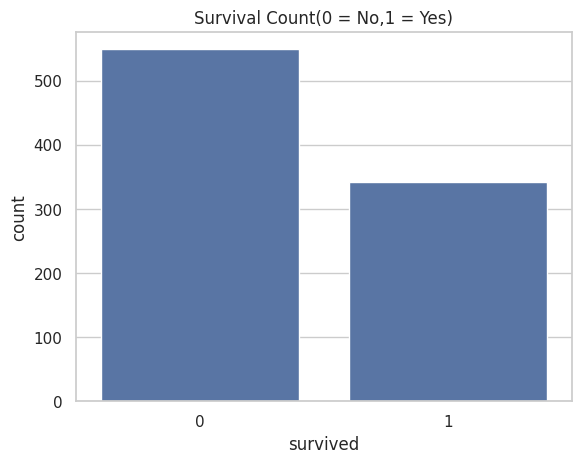

In [ ]:
#Target Variable-Survived
sns.countplot(x="survived",data=titanic)
plt.title("Survival Count(0 = No,1 = Yes)")
plt.show()

#### **Age Distribution**
Here’s what that code does step by step:

**titanic['age'].dropna()** takes the Age column and removes any missing values so they don’t break the plot.

**sns.histplot(..., kde=True, bins=30)** divides the ages into 30 bins (age ranges) and draws bars showing how many passengers fall into each range.

**kde=True** overlays a smooth density curve (KDE) on the histogram, giving you an idea of the underlying age distribution’s shape.

**plt.title('Age Distribution')** adds the title “Age Distribution” above the plot.

**plt.show()** displays the completed chart.

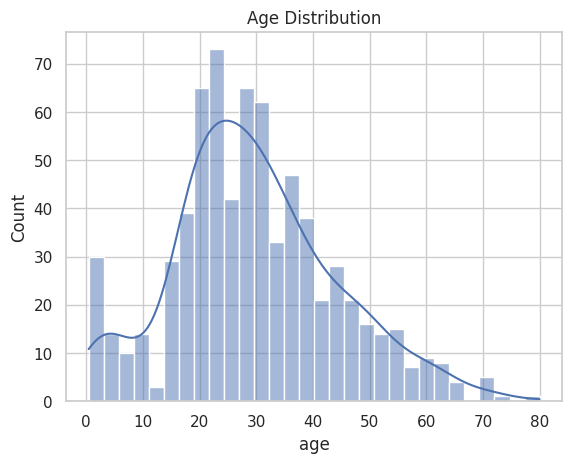

In [ ]:
#Age Distribution
sns.histplot(titanic['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

#### **Gender Count**
This code creates a simple bar chart to show how many male and female passengers there were:

**sns.countplot(x='sex', data=titanic)** draws two bars, one for ‘male’ and one for ‘female’. The height of each bar is the number of passengers of that gender.

**plt.title('Gender Distribution')** adds the title “Gender Distribution” above the chart.

**plt.show()** displays the chart.

In plain terms, you get a quick visual count of how many men and how many women were on the Titanic.

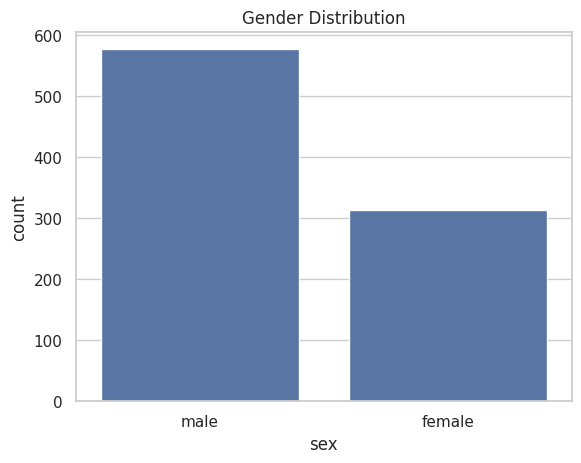

In [ ]:
# Gender Count
sns.countplot(x='sex', data=titanic)
plt.title('Gender Distribution')
plt.show()

### **Step 5: Bivariate Analysis**

#### **Survival By Gender**
**sns.countplot(x='sex', hue='survived', data=titanic)** creates two groups of bars—one group for males and one for females.Within each group, it splits the bar into two colored segments:

Survived = 0 (did not survive)

Survived = 1 (survived)

The height of each segment shows how many passengers of that gender did or did not survive.

**plt.title('Survival by Gender')** adds a descriptive title above the plot.

**plt.show()** displays the finished chart.



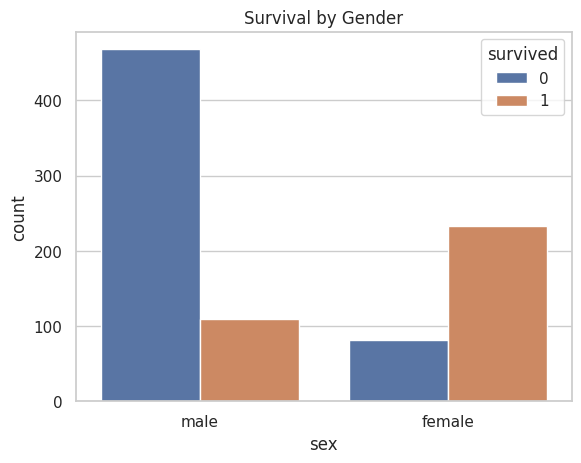

In [ ]:
# Survival By Gender
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival by Gender')
plt.show()

#### **Survival by Class**
Here’s what this code does:

**sns.countplot(x='pclass', hue='survived', data=titanic)** creates three groups of bars, one for each passenger class (1st, 2nd, 3rd). Within each class’s bar, it splits into two colored segments:

Survived = 0 (did not survive)

Survived = 1 (survived)

The height of each segment shows how many passengers in that class did or did not survive.

**plt.title('Survival by Passenger Class')** adds the title “Survival by Passenger Class” above the chart.

**plt.show()** displays the chart so you can see it.

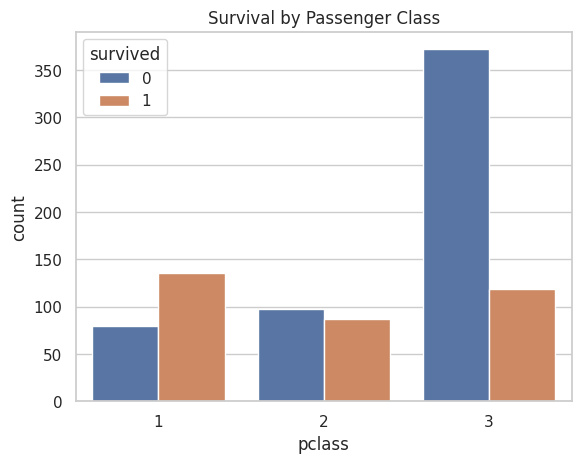

In [ ]:
# Survival by Class
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.show()

#### **Age Vs Survival**
Here’s what that boxplot code does:

**sns.boxplot(x='survived', y='age', data=titanic)** creates two vertical “boxes”: one for survived = 0 (did not survive) and one for survived = 1 (survived).Each box summarizes the age distribution for that group by showing:

    Median age (the line inside the box)

    Interquartile range (the box itself, from the 25th to the 75th percentile)

    Whiskers (extending to roughly the minimum and maximum non-outlier ages)

    Outliers (individual points beyond the whiskers)

**plt.title('Age Distribution by Survival')** adds the title “Age Distribution by Survival” above the plot.

**plt.show()** displays the chart so you can see it.

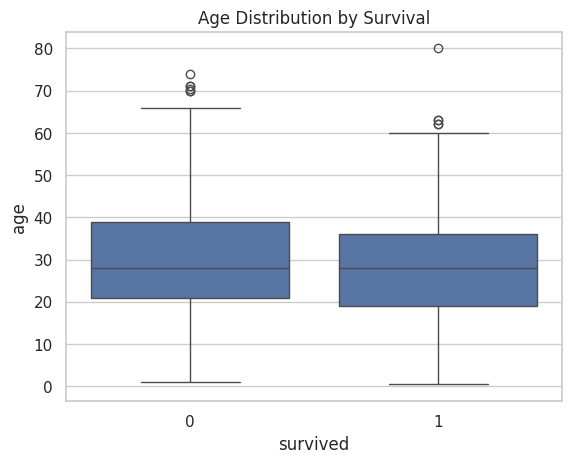

In [ ]:
# Age Vs Survival
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age Distribution by Survival')
plt.show()

#### **Fare Distribution**
In this part,

**sns.histplot(titanic["fare"], bins=40, kde=True)** divides the Fare values into 40 bins (price ranges) and draws bars showing how many passengers paid each fare range.

**kde=True** overlays a smooth density curve (Kernel Density Estimate) on top of the bars, showing the overall shape of the fare distribution.

**plt.title("Fare Distribution")** adds the title “Fare Distribution” above the plot.

**plt.show()** displays the completed chart.

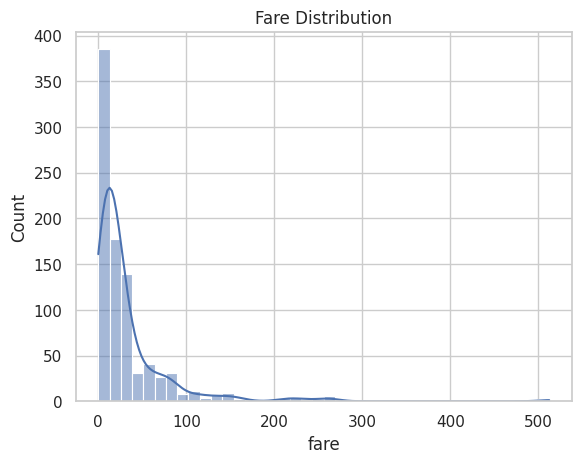

In [ ]:
# Fare Distribution
sns.histplot(titanic["fare"], bins=40,kde=True)
plt.title("Fare Distribution")
plt.show()

### **Step 6: Correlation Matrix**
Here’s what this block does, step by step;

**select_dtypes(include='number')** picks out just the columns that hold numbers (like age, fare, survived, pclass, etc.). You end up with a smaller DataFrame, numeric_data, containing only those numeric features.

**.corr()** calculates the correlation coefficient between every pair of numeric columns. The result is a square table (matrix) where each cell shows how strongly two features move together (from –1 to +1).

**sns.heatmap(..., annot=True)** draws a colored grid where each cell’s color depth reflects the correlation strength.

**annot=True** writes the actual correlation number inside each cell.

**cmap='coolwarm'** uses a blue-to-red color scale (blue for negative, red for positive).

The title **“Correlation Heatmap”** explains what you’re looking at.

**plt.show()** renders the heatmap so you can see which features are strongly related (or not) at a glance.



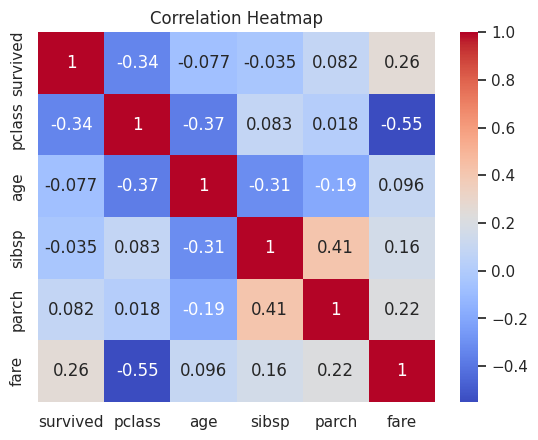

In [ ]:
# Select numeric columns only
numeric_data = titanic.select_dtypes(include='number')

# Compute and plot heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Step 7: Missing Data Overview**
Here’s what this block of code does:

**titanic.isnull()** creates a Boolean DataFrame where each cell is:

    True if the original value is missing (NaN)

    False if it’s present

**sns.heatmap(..., cbar=False, cmap='viridis')** plots this Boolean DataFrame as a heatmap:

    True (missing) shows up in one color, False (present) in another.

    cbar=False hides the color legend bar to keep it simple.

    cmap='viridis' uses the Viridis color palette (dark-to-light gradient) to distinguish missing vs. non-missing.

**plt.title('Missing Data Heatmap')** adds the title “Missing Data Heatmap” above the plot.

**plt.show()** displays the chart so you can see exactly where data is missing in the DataFrame.

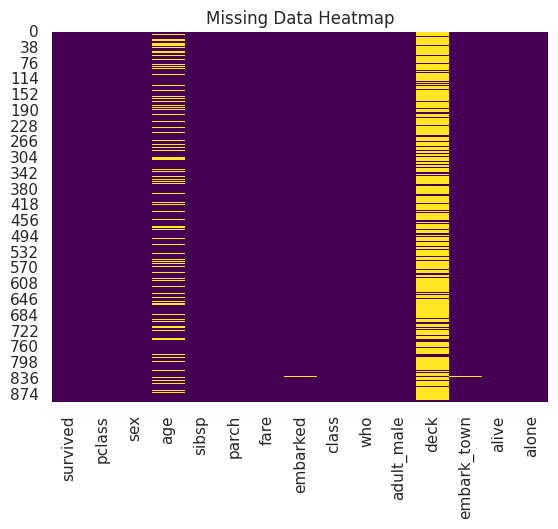

In [ ]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# **Handling Missing Values**

In [ ]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the Titanic dataset directly from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 3: Check how many missing values are in each column
print("🔍 Missing values before handling:\n")
print(df.isnull().sum())

# Step 4: Handle missing values

# 4.1 Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# 4.2 Fill missing 'Embarked' values with the mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 4.3 Drop the 'Cabin' column since it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

# (Optional) Drop any remaining rows with missing values (very few, if any)
df.dropna(inplace=True)

# Step 5: Verify that there are no missing values left
print("\n✅ Missing values after handling:\n")
print(df.isnull().sum())

# Optional: View the cleaned dataset
df.head()

🔍 Missing values before handling:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

✅ Missing values after handling:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-4-1765b04043ac>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-1765b04043ac>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# **Handling Outliers**

<ipython-input-5-75e51fb93d2c>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-75e51fb93d2c>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

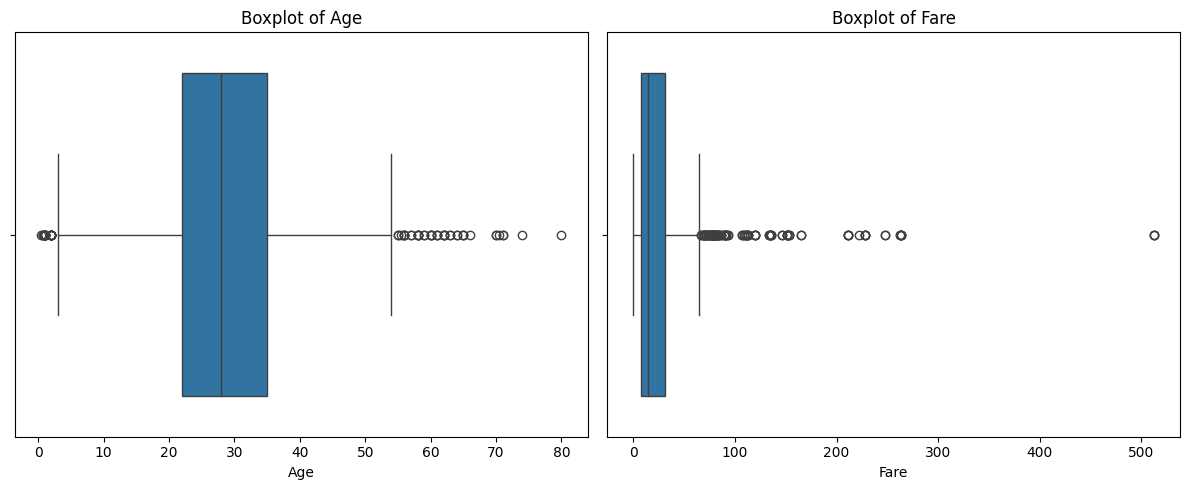

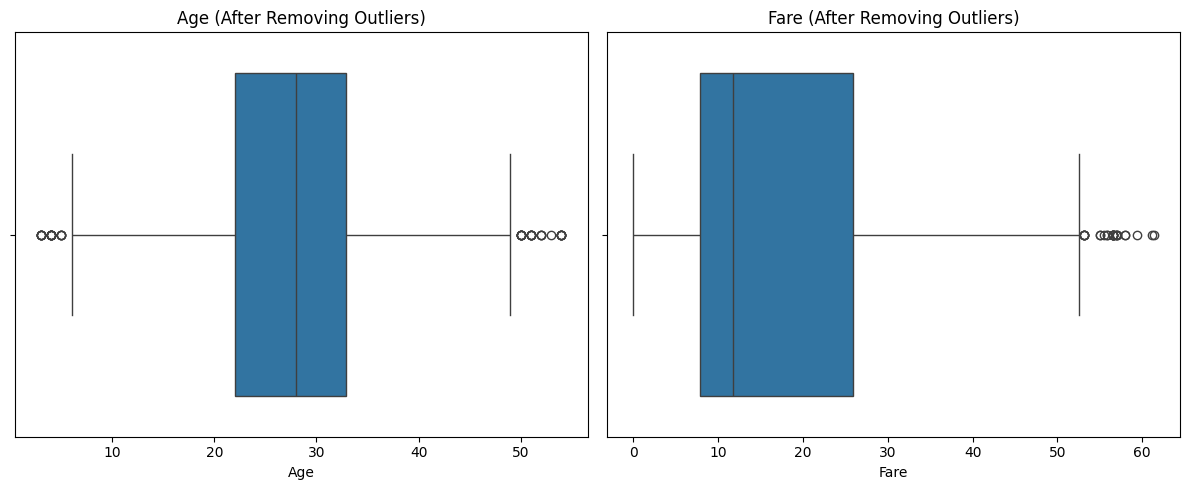

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Titanic dataset from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 3: Handle missing values first (as done earlier)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)

# Step 4: Visualize outliers in Age and Fare using boxplots
plt.figure(figsize=(12, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

# Step 5: Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    # Q1 = 25th percentile, Q3 = 75th percentile
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for normal data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only data within the bounds
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Step 6: Apply the function to remove outliers in 'Age' and 'Fare'
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

# Step 7: Re-plot boxplots to confirm outliers are removed
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Age (After Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Fare (After Removing Outliers)')

plt.tight_layout()
plt.show()

# **Categorical Encoding**

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Step 3: Label Encode the 'Sex' column (Male/Female → 1/0)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Step 4: Fill missing values in 'Embarked' and apply One-Hot Encoding
df['Embarked'].fillna('S', inplace=True)  # Replace missing values with the most common port
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # Convert to dummy vars (e.g., Q, S)

# Step 5: Display the first few rows to see changes
print(df[['Sex', 'Embarked_Q', 'Embarked_S']].head())

   Sex  Embarked_Q  Embarked_S
0    1       False        True
1    0       False       False
2    0       False        True
3    0       False        True
4    1       False        True


<ipython-input-1-d7c26268109b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)  # Replace missing values with the most common port


# **Normalization and Standardization**

**Normalization** and **standardization** are techniques used to scale numerical data. **Normalization** (also called **Min-Max scaling**) adjusts the values in a feature to a fixed range, usually between 0 and 1. It’s useful when your data doesn’t follow a normal distribution and you want all features on the same scale. For example, if you have ages ranging from 10 to 60, normalization will convert them so the smallest becomes 0 and the largest becomes 1. On the other hand, **standardization** (or **Z-score scaling**) transforms the data so that it has a mean of 0 and a standard deviation of 1. This is helpful when your data is roughly normally distributed, and it works well with many machine learning models like Logistic Regression or Support Vector Machines. While normalization compresses data into a narrow range, standardization keeps the spread but shifts and scales it around zero. Both help models train more effectively by making features comparable.

In [2]:
# Step 1: Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Step 2: Load Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Step 3: Encode 'Sex' using LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male = 1, female = 0

# Step 4: One-Hot Encode 'Embarked' (after filling missing values)
df['Embarked'].fillna('S', inplace=True)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Step 5: Select numerical features to scale
features_to_scale = ['Age', 'Fare']

# Handle missing values in 'Age'
df['Age'].fillna(df['Age'].median(), inplace=True)

# Step 6: Apply Normalization (MinMaxScaler)
minmax_scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[features_to_scale] = minmax_scaler.fit_transform(df_norm[features_to_scale])

# Step 7: Apply Standardization (StandardScaler)
std_scaler = StandardScaler()
df_std = df.copy()
df_std[features_to_scale] = std_scaler.fit_transform(df_std[features_to_scale])

# Step 8: Show result
print("🔹Normalized (MinMax) values:")
print(df_norm[features_to_scale].head())

print("\n🔹Standardized (Z-score) values:")
print(df_std[features_to_scale].head())

🔹Normalized (MinMax) values:
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713

🔹Standardized (Z-score) values:
        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


<ipython-input-2-cb4edcc35d99>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)
<ipython-input-2-cb4edcc35d99>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me